<a href="https://colab.research.google.com/github/amannitjsr/Machine-Learning/blob/main/Spam_Mail_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#started
#Importing file 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #vector to read data line by line for getting multiple duplicate data's 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import linear_model

In [2]:
#reading file
mail_data = pd.read_csv('/content/drive/MyDrive/machine learning/spam mail/mail_data.csv')

In [3]:
mail_data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
#check for any null data 
mail_data.info()
#no null data so , we can go ahead

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
#pd.notnull here maildata is replaced null string if nullvalue  is there 
#it contains many null values so we have to replace it .....

mail_data = mail_data.where((pd.notnull(mail_data)),'')   

In [6]:
mail_data.shape

(5572, 2)

In [7]:
#category label
#spam as 0 ; and ham as 1;
mail_data.replace({'Category':{'spam':0,'ham':1}},inplace = True)

In [8]:
mail_data.head(5)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Data spliting
X = mail_data['Message']
Y= mail_data['Category']

In [10]:
#LINEAR REGRESSION
#random means any random arrangement data will be arranged
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1,random_state = 4)

In [11]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(558,)
(5014,)
(558,)
(5014,)


Extracting spam mails

In [12]:
#min_df is used here mins min word must be one , stop words means we want to stop at exclude(is,the ,their , must....)this all common no need to extract this
# we want offer, price , discount word to be repeated here 
# lower case will convert all the letters in the message to lower case 

extract_mails = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True') # a func to convert into numerical value...

#use extract_mails values to transform the data and store that data as int

x_train_st= extract_mails.fit_transform(X_train) #each sentence will get a score that how much time it is repeated....
x_test_st = extract_mails.fit_transform(X_test)

Y_train =Y_train.astype('int')
Y_test =Y_test.astype('int')




In [13]:
print(x_train_st) #each sentence will get a score

  (0, 4661)	0.14582856505916608
  (0, 661)	0.2252960345506853
  (0, 4519)	0.2252960345506853
  (0, 1370)	0.2252960345506853
  (0, 5275)	0.18178508195959625
  (0, 7899)	0.2252960345506853
  (0, 6332)	0.20760456784700962
  (0, 6381)	0.18178508195959625
  (0, 6158)	0.2252960345506853
  (0, 4308)	0.20760456784700962
  (0, 3531)	0.4505920691013706
  (0, 1121)	0.4298943798925562
  (0, 3275)	0.4298943798925562
  (1, 1984)	0.7979146403400589
  (1, 7120)	0.6027704594047343
  (2, 7649)	1.0
  (3, 1822)	0.5027482314853743
  (3, 5984)	0.29124001722881043
  (3, 4521)	0.4237911951097129
  (3, 1416)	0.47965477876145524
  (3, 5637)	0.5027482314853743
  (4, 2275)	0.25972007238874073
  (4, 3325)	0.40065143374077855
  (4, 6739)	0.5378195628696175
  (4, 2495)	0.44617818492452904
  :	:
  (5011, 2516)	0.36213976839741
  (5012, 1350)	0.3644691735543921
  (5012, 1934)	0.3644691735543921
  (5012, 6854)	0.3644691735543921
  (5012, 6568)	0.3477274903386471
  (5012, 1449)	0.32663546392118725
  (5012, 3736)	0.24182

Machine Learning module

In [14]:
model = LogisticRegression()

In [15]:
#training logistic regression
model.fit(x_train_st,Y_train)

LogisticRegression()

In [16]:
#model prediction
model.predict(x_train_st)
accu = accuracy_score(Y_train,model.predict(x_train_st))
print(accu*100,"% of the data is accurately defined")

96.96848823294775 % of the data is accurately defined


In [17]:
c=0
for i in model.predict(x_train_st):
  if i == 1:
     c=c+1
print(c)

4502


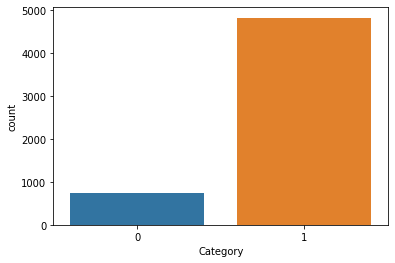

In [18]:

import seaborn as sns
sns.countplot(x='Category', data=mail_data)

